# EXPLORATORY DATA ANALYSIS OF GAPMINDER DATASET 


In [2]:
import numpy as np
import pandas as pd
df=pd.read_csv('gapminder_full - gapminder_full.csv')

In [3]:
df.describe()

,year,population,life_exp,gdp_cap
count,1704.00000,1.704000e+03,1704.000000,1704.000000
mean,1979.50000,2.960121e+07,59.474439,7215.327081
std,17.26533,1.061579e+08,12.917107,9857.454543
min,1952.00000,6.001100e+04,23.599000,241.165876
25%,1965.75000,2.793664e+06,48.198000,1202.060309
50%,1979.50000,7.023596e+06,60.712500,3531.846988
75%,1993.25000,1.958522e+07,70.845500,9325.462346
max,2007.00000,1.318683e+09,82.603000,113523.132900


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     1704 non-null   object 
 1   year        1704 non-null   int64  
 2   population  1704 non-null   int64  
 3   continent   1704 non-null   object 
 4   life_exp    1704 non-null   float64
 5   gdp_cap     1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [5]:
#1.	Load the dataset and display the first few rows. How many countries does the dataset have?
df.head()

,country,year,population,continent,life_exp,gdp_cap
0,Afghanistan,1952,8425333,Asia,28.801,779.445314
1,Afghanistan,1957,9240934,Asia,30.332,820.853030
2,Afghanistan,1962,10267083,Asia,31.997,853.100710
3,Afghanistan,1967,11537966,Asia,34.020,836.197138
4,Afghanistan,1972,13079460,Asia,36.088,739.981106


In [6]:
df['country'].nunique()


142

In [7]:
#2.	Create a pivot table that shows the average life expectancy for each continent and year.
#Index by 'continent', use 'year' as columns, and 'life_exp' as values.
df.pivot_table(index=['continent'],columns='year',values='life_exp',aggfunc='mean')

year,1952,1957,1962,1967,1972,1977,1982,1987,1992,1997,2002,2007
continent,,,,,,,,,,,,
Africa,39.135500,41.266346,43.319442,45.334538,47.450942,49.580423,51.592865,53.344788,53.629577,53.598269,53.325231,54.806038
Americas,53.279840,55.960280,58.398760,60.410920,62.394920,64.391560,66.228840,68.090720,69.568360,71.150480,72.422040,73.608120
Asia,46.314394,49.318544,51.563223,54.663640,57.319269,59.610556,62.617939,64.851182,66.537212,68.020515,69.233879,70.728485
Europe,64.408500,66.703067,68.539233,69.737600,70.775033,71.937767,72.806400,73.642167,74.440100,75.505167,76.700600,77.648600
Oceania,69.255000,70.295000,71.085000,71.310000,71.910000,72.855000,74.290000,75.320000,76.945000,78.190000,79.740000,80.719500


In [8]:
#gdp_75 is the 75th percentile of GDP in the year 2007
gdp_75=df[df['year']==2007]['gdp_cap'].quantile(0.75)
df[(df['gdp_cap']>gdp_75) & (df['year']==2007)]['country'].reset_index(drop=True)

0            Australia
1              Austria
2              Bahrain
3              Belgium
4               Canada
5       Czech Republic
6              Denmark
7              Finland
8               France
9              Germany
10              Greece
11    Hong Kong, China
12             Hungary
13             Iceland
14             Ireland
15              Israel
16               Italy
17               Japan
18         Korea, Rep.
19              Kuwait
20         Netherlands
21         New Zealand
22              Norway
23                Oman
24            Portugal
25         Puerto Rico
26        Saudi Arabia
27           Singapore
28     Slovak Republic
29            Slovenia
30               Spain
31              Sweden
32         Switzerland
33              Taiwan
34      United Kingdom
35       United States
Name: country, dtype: object

In [9]:
labels=['Low','Medium','High','Very High']
df['Life_Exp_Range']=pd.cut(df['life_exp'],labels=labels,bins=4)
df.head()

,country,year,population,continent,life_exp,gdp_cap,Life_Exp_Range
0,Afghanistan,1952,8425333,Asia,28.801,779.445314,Low
1,Afghanistan,1957,9240934,Asia,30.332,820.853030,Low
2,Afghanistan,1962,10267083,Asia,31.997,853.100710,Low
3,Afghanistan,1967,11537966,Asia,34.020,836.197138,Low
4,Afghanistan,1972,13079460,Asia,36.088,739.981106,Low


In [10]:
#Creating a data frame of Top5_gdp having top 5 GDP countries.
Top5_gdp=df[df['year']==2007].sort_values(by='gdp_cap',ascending=False)[['country','gdp_cap']].head().reset_index(drop=True)

Text(0.5, 1.0, 'GDP per capita of top 5 countries')

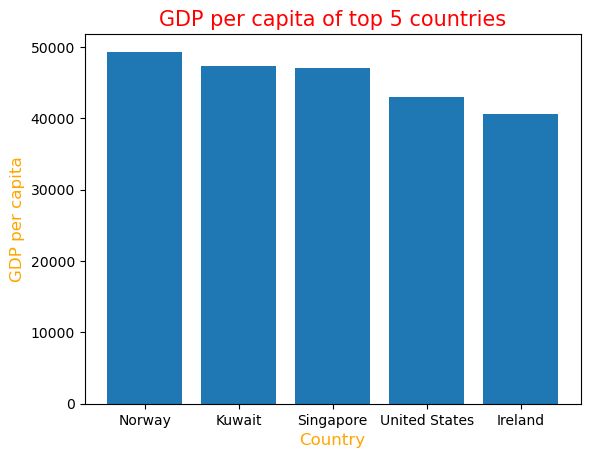

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.bar(data=Top5_gdp,x='country',height='gdp_cap')
plt.xlabel('Country',color='orange',size=12)
plt.ylabel('GDP per capita',color='orange',size=12)
plt.title('GDP per capita of top 5 countries',color='red',size=15)

In [12]:
Top5_gdp

,country,gdp_cap
0,Norway,49357.19017
1,Kuwait,47306.98978
2,Singapore,47143.17964
3,United States,42951.65309
4,Ireland,40675.99635


In [13]:
import re
pattern=r'^I[a-z]*a$'
df['country'][df['country'].str.contains(pattern,regex=True)].unique()

array(['India', 'Indonesia'], dtype=object)

Text(0.5, 1.0, 'GDP Per Capita Continent wise')

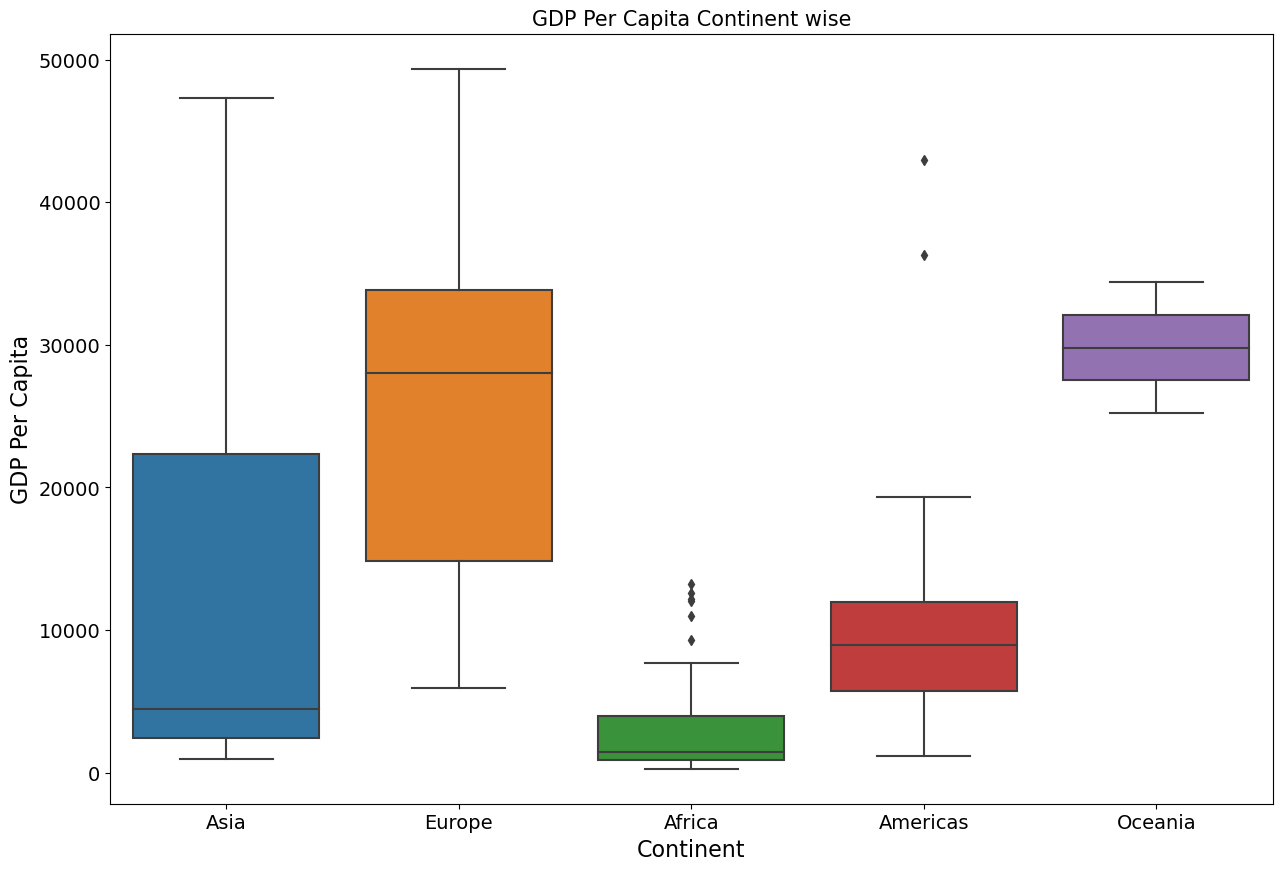

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
#df_2007 is the filtered data frame with year 2007
df_2007=df[df['year']==2007]
plt.figure(figsize=(15,10))
sns.boxplot(x='continent',y='gdp_cap',data=df_2007)
plt.xlabel('Continent', fontsize=16)
plt.ylabel('GDP Per Capita', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('GDP Per Capita Continent wise', fontsize=15)

In [15]:
df_2007[df_2007['life_exp']>80][['country','continent']].reset_index(drop=True)

,country,continent
0,Australia,Oceania
1,Canada,Americas
2,France,Europe
3,"Hong Kong, China",Asia
4,Iceland,Europe
5,Israel,Asia
6,Italy,Europe
7,Japan,Asia
8,New Zealand,Oceania
9,Norway,Europe


In [16]:
#coverting year column into date time format
df['year']=pd.to_datetime(df['year'],format='%Y')

#extracting year from the date
df['year']=df['year'].dt.year

#creating "decade" column from the year column by
df['Decade']=(df['year']//10)*10
df['Decade']=df['Decade'].astype(str)+'s'


Text(0.5, 1.0, 'Correlation Heat Map')

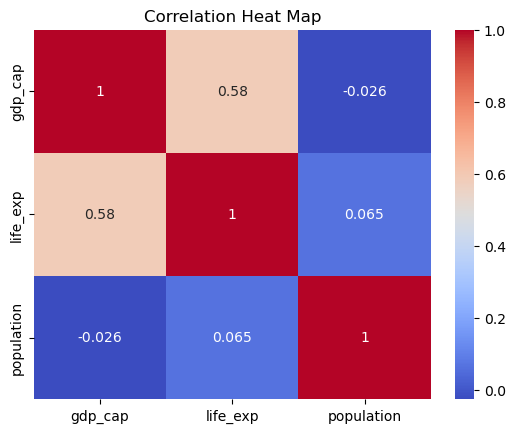

In [17]:
#Created Correlation matrix between 'gdp_cap','life_exp' and 'population' column and stored it in the variable "corr_matrix"
corr_matrix=df[['gdp_cap','life_exp','population']].corr()

#created heat map with the correlation matrix
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heat Map')

C:\Users\JK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Life expectnacy')

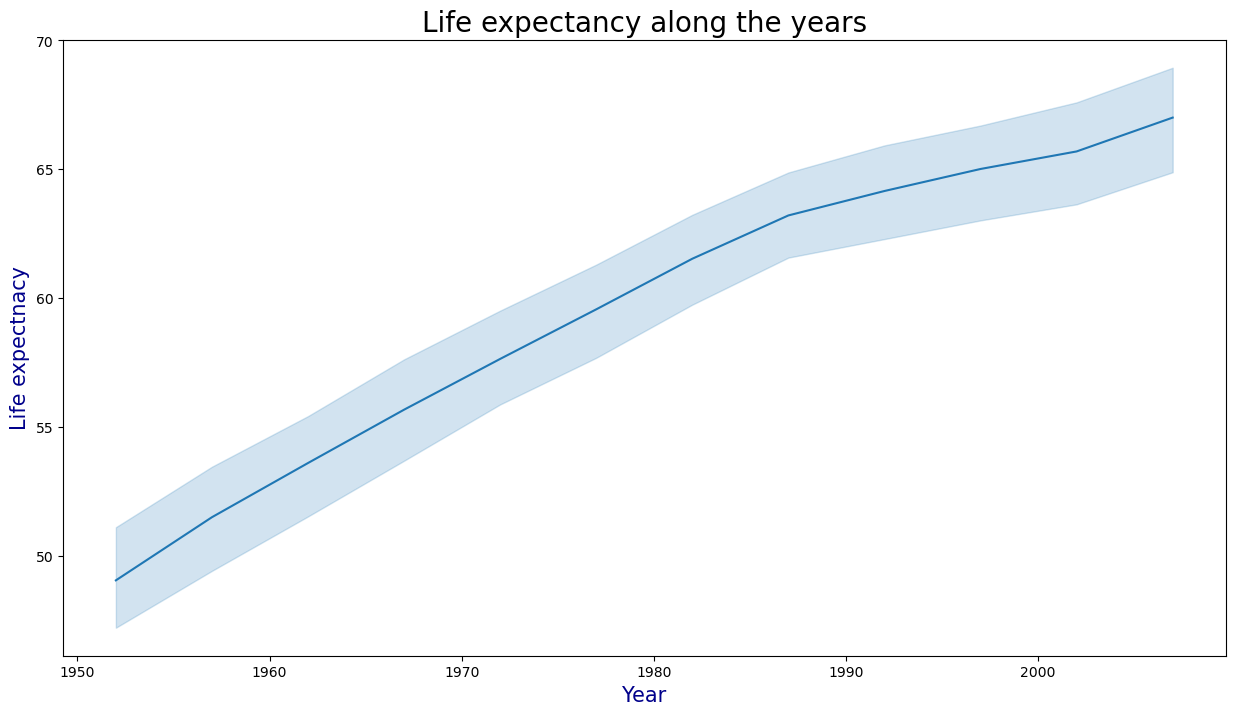

In [18]:
plt.figure(figsize=(15,8))
sns.lineplot(data=df,x='year',y='life_exp')
plt.title('Life expectancy along the years',size=20)
plt.xlabel('Year',size=15,color='darkblue')
plt.ylabel('Life expectnacy',size=15,color='darkblue')

Text(0.5, 1.0, 'Relation ship between GDP per capita and Life expectancy')

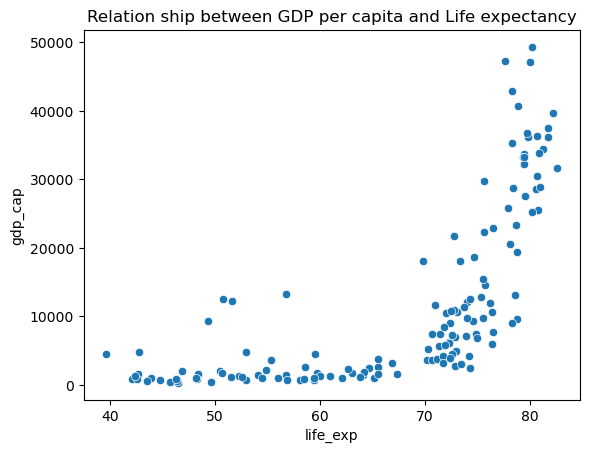

In [21]:
sns.scatterplot(data=df_2007,x='life_exp',y='gdp_cap')
plt.title('Relation ship between GDP per capita and Life expectancy')

Text(0.5, 1.0, 'Relation ship between GDP per capita and Life expectancy')

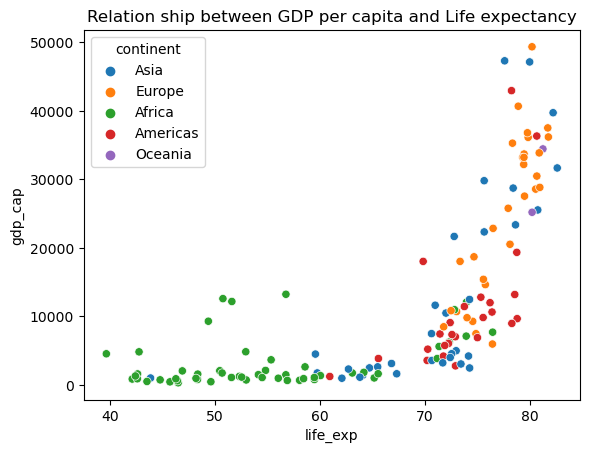

In [22]:
sns.scatterplot(data=df_2007,x='life_exp',y='gdp_cap',hue='continent')
plt.title('Relation ship between GDP per capita and Life expectancy')

In [23]:
#Calculated average GDP per capita per continent using grouping and created data frame and stored it in
#in the variable gdp_con2007
gdp_con2007=df_2007.groupby('continent')['gdp_cap'].mean().reset_index()
gdp_con2007

,continent,gdp_cap
0,Africa,3089.032605
1,Americas,11003.031625
2,Asia,12473.026870
3,Europe,25054.481636
4,Oceania,29810.188275


Text(0.5, 1.0, 'GDP Per Capita in 2007')

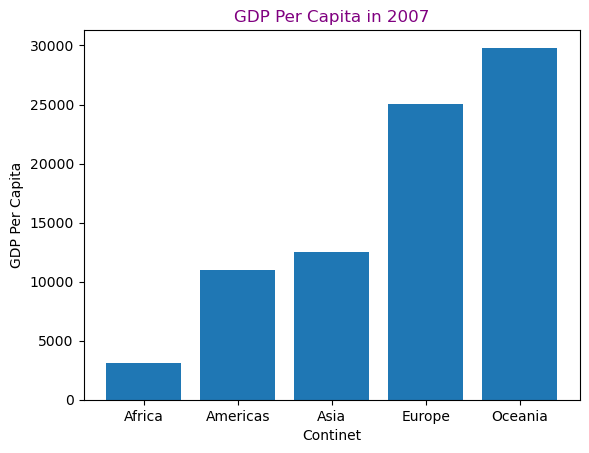

In [37]:
plt.bar(data=gdp_con2007,x='continent',height='gdp_cap')
plt.xlabel('Continet')
plt.ylabel('GDP Per Capita')
plt.title('GDP Per Capita in 2007',color='purple')

In [42]:
#filtered the df_2007 dataframe with countries Afghanistan and switzerland and stored
#it in the variable df_2007AS
df_2007AS=df_2007[df_2007['country'].isin(['Afghanistan','Switzerland'])]

#Created a dataframe by filtering with countires Afghanistan and Switzerland from the dataframe df
#and stored it in the variable df_AS
df_AS=df[df['country'].isin(['Afghanistan','Switzerland'])]

Text(0.5, 1.0, 'Life Expectancy of Afghanistan and Switzerland')

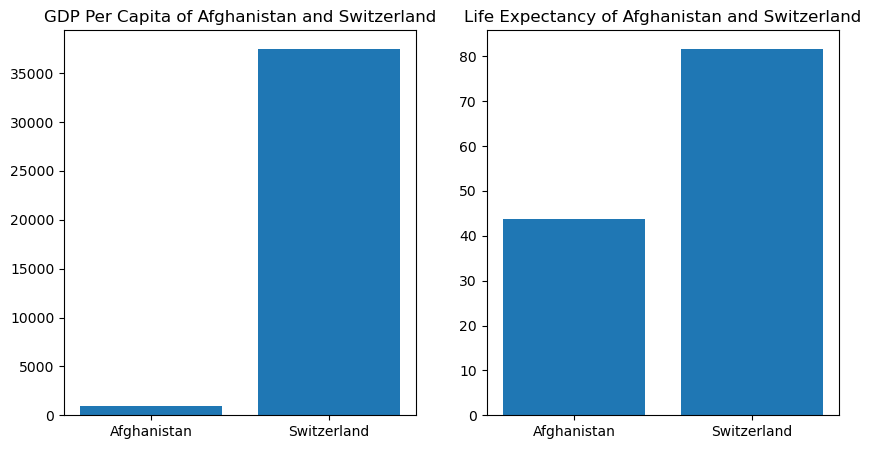

In [48]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.bar(data=df_2007AS,x='country',height='gdp_cap')
plt.title('GDP Per Capita of Afghanistan and Switzerland')

plt.subplot(1,2,2)
plt.bar(data=df_2007AS,x='country',height='life_exp')
plt.title('Life Expectancy of Afghanistan and Switzerland')

C:\Users\JK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\JK\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

Text(0.5, 1.0, 'GDP Per Capita over the years')

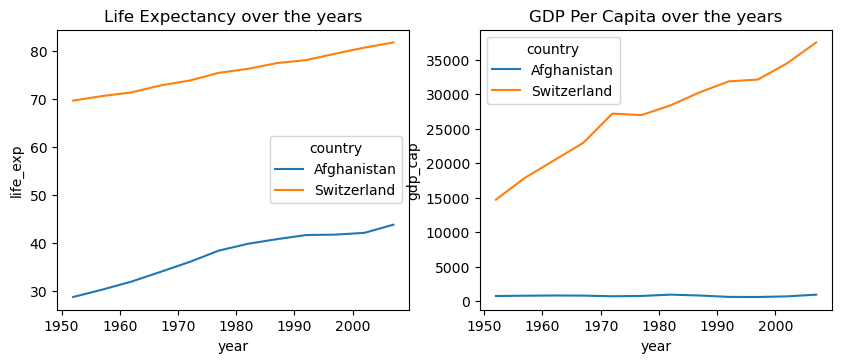

In [49]:
plt.figure(figsize=(10,8))

plt.subplot(2,2,3)
sns.lineplot(data=df_AS,x='year',y='life_exp',hue='country')
plt.title('Life Expectancy over the years')

plt.subplot(2,2,4)
sns.lineplot(data=df_AS,x='year',y='gdp_cap',hue='country')
plt.title('GDP Per Capita over the years')